In [131]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
os.chdir("E:\Data Science\kaggle\Python 2nd iter")

filename = "train.csv"
train_df = pd.read_csv(filename)             # Importing training and testing data
test_df = pd.read_csv('test.csv')

# We will fill in the mean of the column 'Age' into the missing values. 
print train_df.median()
print ("-"*18)

train_df = train_df.drop('Cabin',axis=1)                #dropped the cabin,embarked,ticket column 
train_df = train_df.drop('Embarked',axis=1)
train_df = train_df.drop('Ticket',axis=1)

# We will fill in the median of the column 'Age' into the missing values
train_df['Age'] = train_df['Age'].fillna(train_df.median()['Age']) 
print train_df.info()
print ("-"*18)

# After checking the Age attribute it is clear that there are no null values in there.



PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB
None
------------------


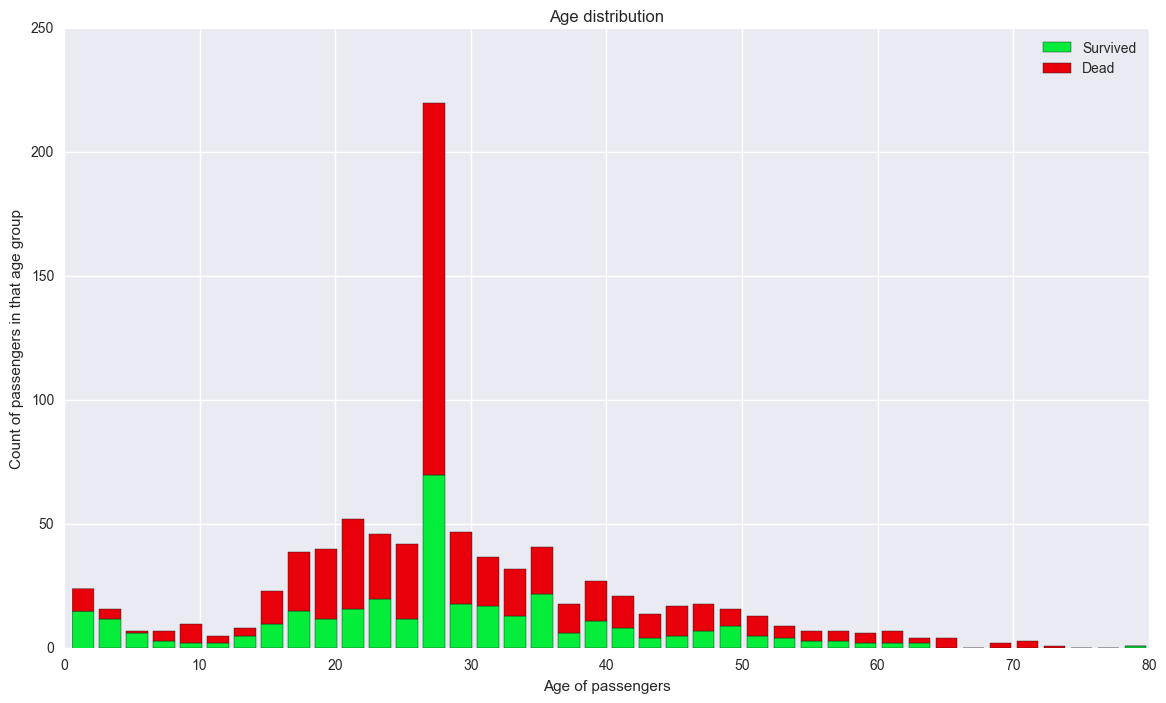

In [132]:
# Time to plot some graphs and visualize data for better understanding of what's going on
%matplotlib inline
# Plot age
figure = plt.figure(figsize=(14,8))
plt.hist([train_df[train_df['Survived']==1]['Age'],train_df[train_df['Survived']==0]['Age']], stacked=True, 
         color = ['g','r'],bins = 40,label = ['Survived','Dead'])
plt.xlabel('Age of passengers')
plt.ylabel('Count of passengers in that age group')
plt.title('Age distribution')
plt.legend()
plt.show()
print "\n"

# The count is very high in the range 25-30 
# In the first four bins (from left) the ratio of survived/dead is high while above 15 and below 50 is looks pretty low
# That makes sense, as children are rescued first.

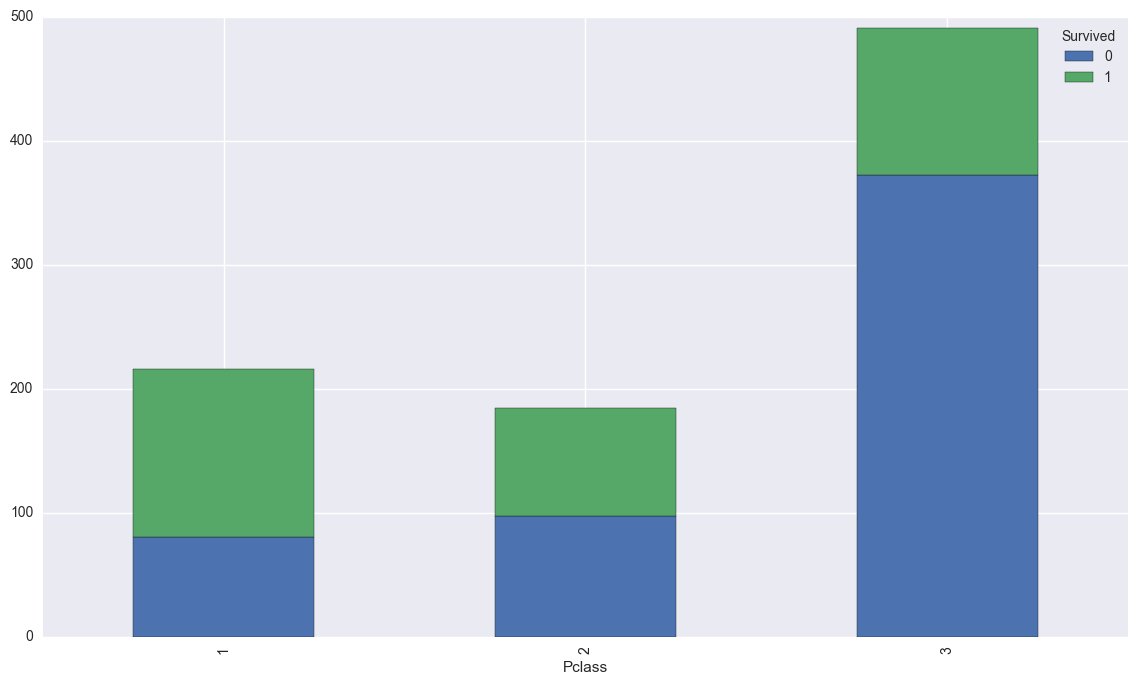

In [133]:
# Plot class 

pd.crosstab(train_df.Pclass,train_df.Survived).plot(kind='bar',stacked=True,figsize=(14,8))

# The graph below shows that people in "First Class" have a better chance of survival than people in "Third Class" 

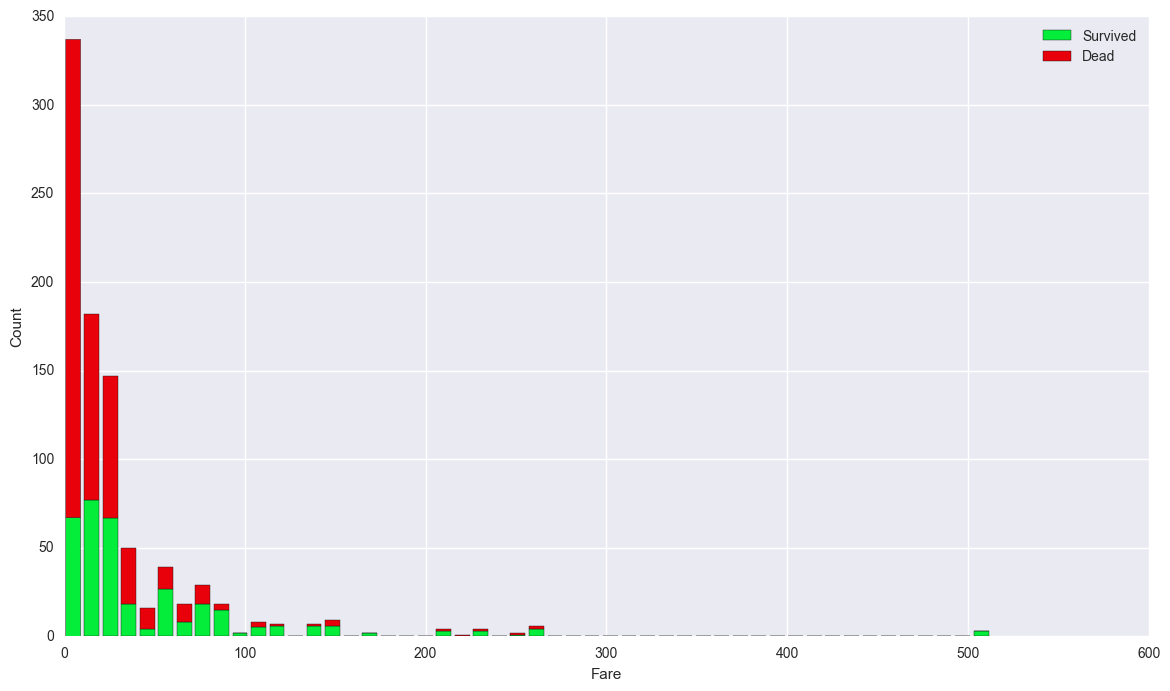

In [134]:
# Plot fare
train_df.groupby('Pclass').Survived.agg(['mean','count'])
sns.set_color_codes(palette='bright')
plt.figure(figsize=(14,8))
plt.hist([train_df[train_df['Survived']==1]['Fare'],train_df[train_df['Survived']==0]['Fare']],
         stacked=True,bins=50,label=['Survived','Dead'],color=['g','r'])
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

# People with low fares have worse chance of survival. 

In [135]:
# Let's convert the "Sex" into numeric values (male=1,female=0) 

def sex_prep(p):
    for i in range(len(p)):
        if p[i] == 'male':
            p[i] = 1
        else:
            p[i] = 0
    return p

train_df['Sex'] = sex_prep(train_df['Sex'].values)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500


In [136]:
# The "Name" column contains strings, but the logistic regression model can't make any sense of strings. 
# So we have to extract information from the strings and convert it to numeric form. 
# One way to do this is split "Name" entry and extract the part between (,) and (.) 
# The returned values can be ('Mr,Mrs,Miss,Capt') etc

def Name_prep(p):
    for i in range(len(p)):
        p[i] = p[i].split(',')[1].split('.')[0]
    return p

Name_prep(train_df['Name'].values)
train_df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,Mr,1,22.0,1,0,7.2500
1,2,1,1,Mrs,0,38.0,1,0,71.2833
2,3,1,3,Miss,0,26.0,0,0,7.9250
3,4,1,1,Mrs,0,35.0,1,0,53.1000
4,5,0,3,Mr,1,35.0,0,0,8.0500


In [137]:
# Let's have a quick look at the test data.
test_df.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [138]:
# To apply any machine learning algorithm, we need the training and test data to have same features/columns

test_df = test_df.drop('Cabin',axis=1)                #dropped the cabin,embarked,ticket column 
test_df = test_df.drop('Embarked',axis=1)
test_df = test_df.drop('Ticket',axis=1)
Name_prep(test_df['Name'].values)
test_df['Sex']= sex_prep(test_df['Sex'].values)
test_df.head()
# All test data prepped like training data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,Mr,1,34.5,0,0,7.8292
1,893,3,Mrs,0,47.0,1,0,7.0000
2,894,2,Mr,1,62.0,0,0,9.6875
3,895,3,Mr,1,27.0,0,0,8.6625
4,896,3,Mrs,0,22.0,1,1,12.2875


In [139]:
print train_df.groupby('Name').Survived.agg(['count','mean'])
print test_df.groupby('Name').PassengerId.agg(['count'])

Post={" Capt":"Risky"," Don":"Risky"," Rev":"Risky", " Rev":"Risky"," Jonkheer":"Risky",
         " Dona":"Safe"," Ms":"Safe"," the Countess":"Safe"," Sir":"Safe"," Lady":"Safe"," Mlle":"Safe"," Mme":"Safe",         
          " Major":"Major"," Col":"Major"," Dr":"Major",                   
           " Mr" : "Mr", " Mrs" :"Miss"," Miss" :"Miss",       
              " Master" :    "Master",           
                 }       

# By looking at the mean survival rate, we can group some titles that have similar survival probability.                 
# So we've created a dictionary that'll map elements from the dataset.

               count      mean
Name                          
 Capt              1  0.000000
 Col               2  0.500000
 Don               1  0.000000
 Dr                7  0.428571
 Jonkheer          1  0.000000
 Lady              1  1.000000
 Major             2  0.500000
 Master           40  0.575000
 Miss            182  0.697802
 Mlle              2  1.000000
 Mme               1  1.000000
 Mr              517  0.156673
 Mrs             125  0.792000
 Ms                1  1.000000
 Rev               6  0.000000
 Sir               1  1.000000
 the Countess      1  1.000000
         count
Name          
 Col         2
 Dona        1
 Dr          1
 Master     21
 Miss       78
 Mr        240
 Mrs        72
 Ms          1
 Rev         2


In [140]:
# We'll map elements in this step and check if the mapping is correctly done.

def post_Names(p):
    for i in range(len(p)):
        p[i] = Post[p[i]]
    return p    

post_Names(train_df['Name'].values)
post_Names(test_df['Name'].values)

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,Mr,1,22.0,1,0,7.2500
1,2,1,1,Miss,0,38.0,1,0,71.2833
2,3,1,3,Miss,0,26.0,0,0,7.9250
3,4,1,1,Miss,0,35.0,1,0,53.1000
4,5,0,3,Mr,1,35.0,0,0,8.0500


In [141]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,Mr,1,34.5,0,0,7.8292
1,893,3,Miss,0,47.0,1,0,7.0000
2,894,2,Mr,1,62.0,0,0,9.6875
3,895,3,Mr,1,27.0,0,0,8.6625
4,896,3,Miss,0,22.0,1,1,12.2875


In [142]:
# Creating dummy columns to extract information of the group we mapped in the previous step

# Training set
post_dummies = pd.get_dummies(train_df['Name'],prefix='post')
train_df = pd.concat([train_df,post_dummies],axis=1)
train_df.drop('Name',axis=1,inplace=True)
Survived = train_df.Survived
train_df.drop('Survived',axis=1,inplace=True)
train_df.drop('PassengerId',axis=1,inplace=True)
train_df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,post_Major,post_Master,post_Miss,post_Mr,post_Risky,post_Safe
0,3,1,22.0,1,0,7.2500,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,38.0,1,0,71.2833,0.0,0.0,1.0,0.0,0.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0
4,3,1,35.0,0,0,8.0500,0.0,0.0,0.0,1.0,0.0,0.0


In [143]:
# Test set
post_dummies = pd.get_dummies(test_df['Name'],prefix='post')
test_df = pd.concat([test_df,post_dummies],axis=1)
test_df.drop('Name',axis=1,inplace=True)
PassengerId = test_df['PassengerId']
test_df.drop('PassengerId',axis=1,inplace=True)
test_df['Age'] = train_df['Age'].fillna(train_df.median()['Age']) 
test_df['Fare'] = train_df['Fare'].fillna(train_df.median()['Fare'])
test_df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,post_Major,post_Master,post_Miss,post_Mr,post_Risky,post_Safe
0,3,1,22.0,0,0,7.2500,0.0,0.0,0.0,1.0,0.0,0.0
1,3,0,38.0,1,0,71.2833,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1,26.0,0,0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1,35.0,0,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0
4,3,0,35.0,1,1,8.0500,0.0,0.0,1.0,0.0,0.0,0.0


In [144]:
# Now that our data is finally ready, its time for using a machine learning algorithm to predict the output.
# We'll be using a simple "logistic regression".

from sklearn import linear_model

lr = linear_model.LogisticRegression(max_iter=800,C=1)
lr.fit(X=train_df,y=Survived)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=800, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
# Our model predicted around 83% of the data in the training set correctly. 

lr.score(X=train_df,y=Survived)  

0.83052749719416386

In [146]:
Prediction = lr.predict(X=test_df)
print len(Prediction)

418


In [147]:
# We prediction model is ready. Let's store the result in a variable and write it to csv file. 

submission = pd.DataFrame({'PassengerId':PassengerId,'Survived':Prediction })

submission.to_csv('Submission.csv',index=False)

# This model got me a score of "0.77512" in the kaggle competition. Certainly there is a lot of room for improvement.
# I shall be updating this model, making changes to see if the score changes. 